In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('takehome_user_engagement.csv')

In [3]:
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [4]:
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
df1['time_stamp_day'] = df1['time_stamp'].dt.floor('D')

In [9]:
df1.shape

(207917, 4)

In [10]:
daily  = df1.drop_duplicates(['user_id','time_stamp_day'])
daily.head()

,time_stamp,user_id,visited,time_stamp_day
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [11]:
daily.shape

(207917, 4)

In [12]:
daily['time_stamp_day'].min(),daily['time_stamp_day'].max()

(Timestamp('2012-05-31 00:00:00'), Timestamp('2014-06-06 00:00:00'))

In [13]:
daily['user_id'].nunique()

8823

In [14]:
daily = daily.sort_values(['user_id','time_stamp_day',])
daily.head()

,time_stamp,user_id,visited,time_stamp_day
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [15]:
daily["days_in_last_7"] = (
    daily.set_index("time_stamp_day")
         .groupby("user_id")["visited"]
         .rolling("7D", min_periods=1)
         .sum()
         .reset_index(level=0, drop=True)
         .values
)
#.reset_index(level=0, drop=True) #level=0, drop=True

In [16]:
daily.head()

,time_stamp,user_id,visited,time_stamp_day,days_in_last_7
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0


In [17]:
daily["target_active"] = (daily["days_in_last_7"] > 3).astype(int)

In [18]:
daily.head()

,time_stamp,user_id,visited,time_stamp_day,days_in_last_7,target_active
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0


In [19]:
df2 = pd.read_csv('takehome_users.csv',encoding ='latin1')

In [20]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [21]:
df = df2.merge(daily,how='left',left_on='object_id', right_on='user_id')

In [22]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,time_stamp_day,days_in_last_7,target_active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0,2014-04-22,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0,2013-11-15,1.0,0.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0,2013-11-29,1.0,0.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0,2013-12-09,1.0,0.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0,2013-12-25,1.0,0.0


In [23]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'user_id', 'visited', 'time_stamp_day', 'days_in_last_7',
       'target_active'],
      dtype='object')

In [24]:
df.drop(columns=['user_id'], inplace = True)

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                     3177
visited                        3177
time_stamp_day                 3177
days_in_last_7                 3177
target_active                  3177
dtype: int64

In [27]:
#df.drop(columns=['days_in_last_7'], inplace = True)

In [28]:
df["last_session_datetime"] = pd.to_datetime(
    df["last_session_creation_time"],
    unit="s",
    origin="unix"
)

In [29]:
df["last_login_date"] = df["last_session_datetime"].dt.date
df["last_login_year"] = df["last_session_datetime"].dt.year
df["last_login_month"] = df["last_session_datetime"].dt.month
df["last_login_day"] = df["last_session_datetime"].dt.day

In [30]:
df[["last_session_creation_time", "last_session_datetime"]].head()

,last_session_creation_time,last_session_datetime
0,1.398139e+09,2014-04-22 03:53:30
1,1.396238e+09,2014-03-31 03:45:04
2,1.396238e+09,2014-03-31 03:45:04
3,1.396238e+09,2014-03-31 03:45:04
4,1.396238e+09,2014-03-31 03:45:04


In [31]:
df["last_session_datetime"].max()

Timestamp('2014-06-06 14:58:50')

In [32]:
#user never logged in
df["never_logged_in"] = df["last_session_creation_time"].isna().astype(int)

In [33]:
#user was NOT invited by anyone (organic signup)
df["was_invited"] = df["invited_by_user_id"].notna().astype(int)

In [34]:
df["visited"] = df["visited"].fillna(0)
df["days_in_last_7"] = df["days_in_last_7"].fillna(0)
df["target_active"] = df["target_active"].fillna(0)

In [35]:
#df = df.drop(columns=["time_stamp", "time_stamp_day","last_session_creation_time","invited_by_user_id"],)

In [36]:
df.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                     3177
visited                           0
time_stamp_day                 3177
days_in_last_7                    0
target_active                     0
last_session_datetime          3177
last_login_date                3177
last_login_year                3177
last_login_month               3177
last_login_day                 3177
never_logged_in                   0
was_invited                       0
dtype: int64

In [37]:
df.shape

(211094, 22)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211094 entries, 0 to 211093
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   object_id                   211094 non-null  int64         
 1   creation_time               211094 non-null  object        
 2   name                        211094 non-null  object        
 3   email                       211094 non-null  object        
 4   creation_source             211094 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    211094 non-null  int64         
 7   enabled_for_marketing_drip  211094 non-null  int64         
 8   org_id                      211094 non-null  int64         
 9   invited_by_user_id          118528 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     211094 non-

In [39]:
df3 = df.copy()

In [40]:
df3 = df3.drop(columns=["time_stamp","invited_by_user_id"])

In [41]:
df3.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,visited,time_stamp_day,days_in_last_7,target_active,last_session_datetime,last_login_year,last_login_month,last_login_day,never_logged_in,was_invited
count,211094.000000,2.079170e+05,211094.000000,211094.000000,211094.000000,211094.000000,207917,211094.000000,211094.000000,207917,207917.000000,207917.000000,207917.000000,211094.000000,211094.000000
mean,5913.818777,1.399439e+09,0.257890,0.154344,163.949558,0.984950,2013-10-29 16:42:23.861252352,4.315452,0.628952,2014-05-07 05:11:26.560858624,2013.929770,5.634162,12.655237,0.015050,0.561494
min,1.000000,1.338452e+09,0.000000,0.000000,0.000000,0.000000,2012-05-31 00:00:00,0.000000,0.000000,2012-05-31 08:20:06,2012.000000,1.000000,1.000000,0.000000,0.000000
25%,3081.000000,1.401045e+09,0.000000,0.000000,60.000000,1.000000,2013-07-16 00:00:00,3.000000,0.000000,2014-05-25 19:05:07,2014.000000,5.000000,4.000000,0.000000,0.000000
50%,5685.000000,1.401665e+09,0.000000,0.000000,145.000000,1.000000,2013-12-03 00:00:00,4.000000,1.000000,2014-06-01 23:22:37,2014.000000,6.000000,4.000000,0.000000,1.000000
75%,8944.000000,1.401868e+09,1.000000,0.000000,260.000000,1.000000,2014-03-13 00:00:00,6.000000,1.000000,2014-06-04 07:48:54,2014.000000,6.000000,24.000000,0.000000,1.000000
max,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,1.000000,2014-06-06 00:00:00,7.000000,1.000000,2014-06-06 14:58:50,2014.000000,12.000000,31.000000,1.000000,1.000000
std,3395.988763,8.294017e+06,0.437474,0.361279,121.240661,0.121753,NaN,2.096247,0.483086,NaN,0.298957,1.135708,11.013021,0.121753,0.496205


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211094 entries, 0 to 211093
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   object_id                   211094 non-null  int64         
 1   creation_time               211094 non-null  object        
 2   name                        211094 non-null  object        
 3   email                       211094 non-null  object        
 4   creation_source             211094 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    211094 non-null  int64         
 7   enabled_for_marketing_drip  211094 non-null  int64         
 8   org_id                      211094 non-null  int64         
 9   visited                     211094 non-null  float64       
 10  time_stamp_day              207917 non-null  datetime64[ns]
 11  days_in_last_7              211094 non-

In [43]:

# convert timestamp
df3["creation_time"] = pd.to_datetime(df3["creation_time"])

# convert count / binary columns to int
df3["visited"] = df3["visited"].astype(int)
df3["days_in_last_7"] = df3["days_in_last_7"].astype(int)
df3["target_active"] = df3["target_active"].astype(int)

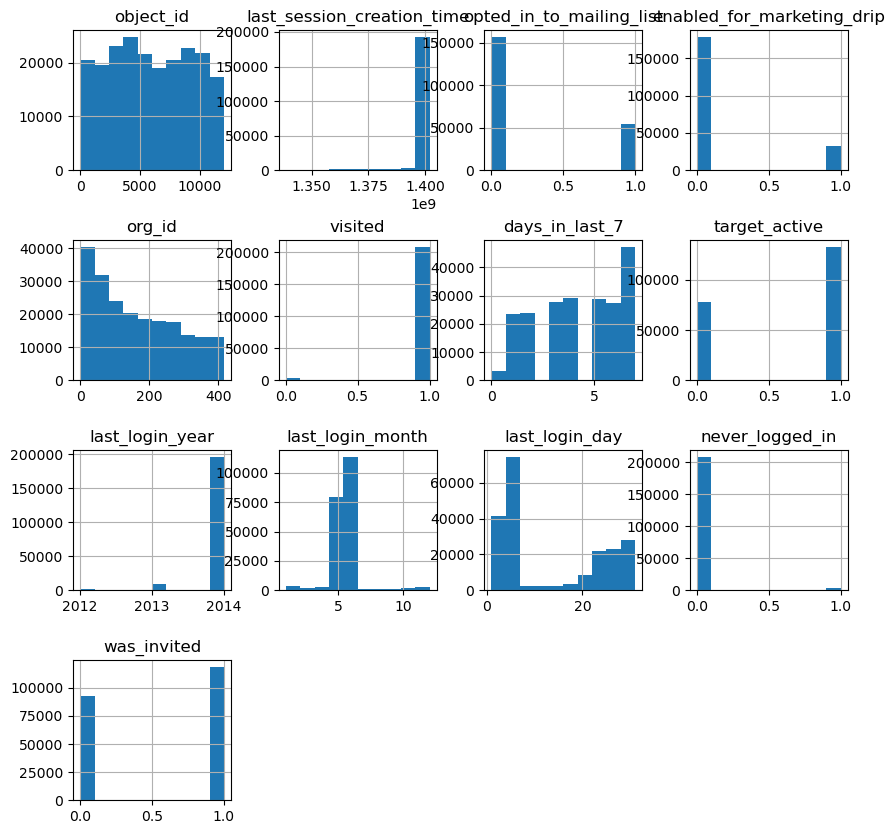

In [44]:
df_num = df3.select_dtypes(include="number")

df_num.hist(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [45]:
df_num = df3.select_dtypes(include="number")

In [46]:
df_num.columns

Index(['object_id', 'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'visited', 'days_in_last_7',
       'target_active', 'last_login_year', 'last_login_month',
       'last_login_day', 'never_logged_in', 'was_invited'],
      dtype='object')

In [47]:
df_num = df_num.drop(columns = ['days_in_last_7','object_id','org_id','last_session_creation_time'])

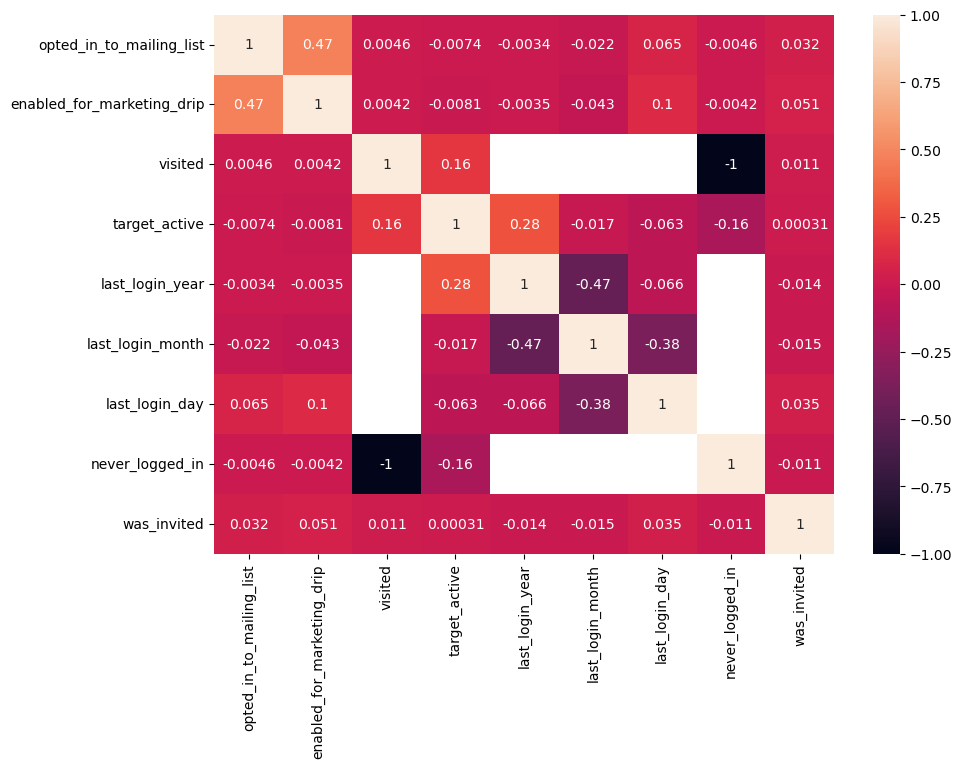

In [48]:
plt.figure(figsize =(10,7))
sns.heatmap(df_num.corr(),annot = True)
plt.show()

In [49]:
df3.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'visited', 'time_stamp_day',
       'days_in_last_7', 'target_active', 'last_session_datetime',
       'last_login_date', 'last_login_year', 'last_login_month',
       'last_login_day', 'never_logged_in', 'was_invited'],
      dtype='object')

In [51]:
#df_num1 = df_num.drop(columns=["days_in_last_7","object_id","org_id","target_active"])

<Figure size 1000x2000 with 0 Axes>

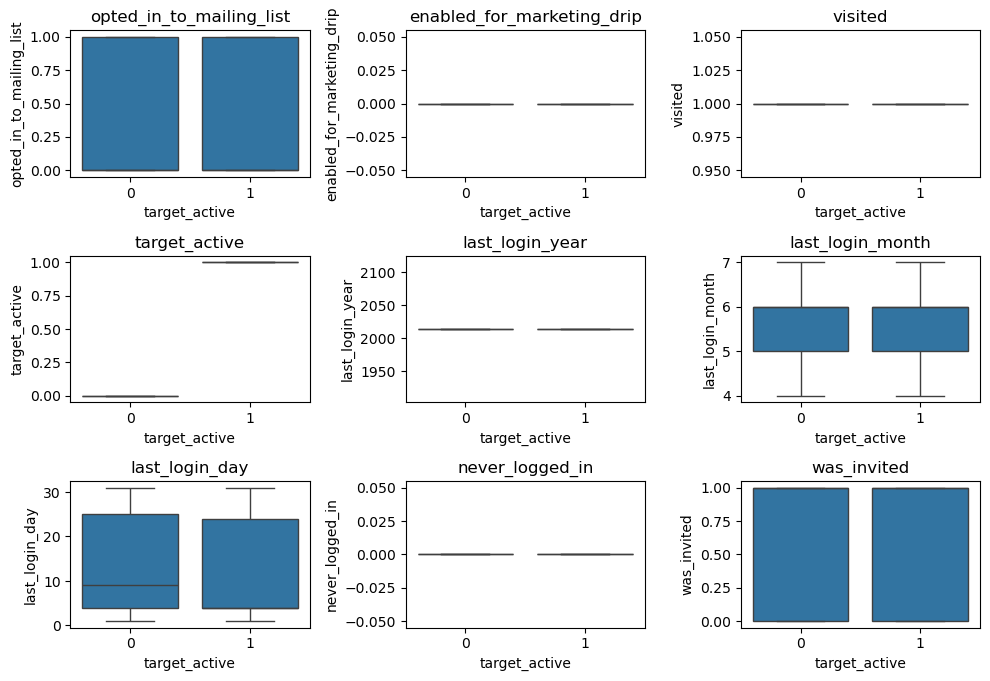

In [53]:
plt.figure(figsize=(10,20))

for i, col in enumerate(df_num.columns, 1):
    plt.subplot(len(df_num.columns), 3, i)
    sns.boxplot(x='target_active', y=col, data=df3, showfliers = False)
    #plt.adjust_subplots(hspace=0.3, wspace=0.5)
    plt.title(col)

plt.tight_layout()
plt.show()

In [54]:
df_cat = df3.select_dtypes(include = ['category','object','bool'])

In [55]:
df_cat.columns

Index(['name', 'email', 'creation_source', 'last_login_date'], dtype='object')

In [56]:
df3.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'visited', 'time_stamp_day',
       'days_in_last_7', 'target_active', 'last_session_datetime',
       'last_login_date', 'last_login_year', 'last_login_month',
       'last_login_day', 'never_logged_in', 'was_invited'],
      dtype='object')

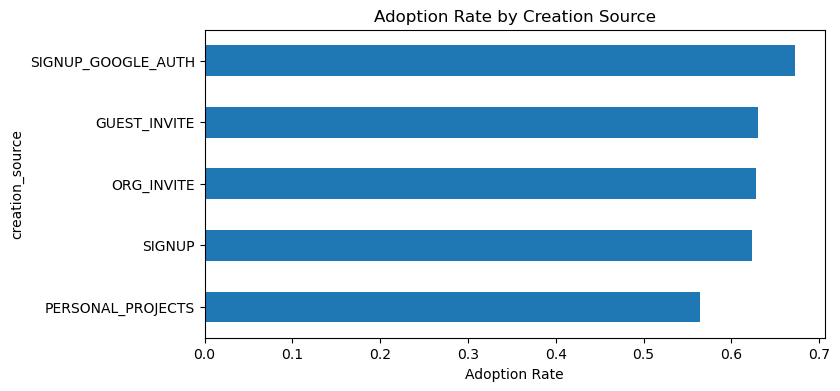

In [57]:
df3.groupby("creation_source")["target_active"].mean().sort_values().plot(
    kind="barh", figsize=(8,4)
)
plt.xlabel("Adoption Rate")
plt.title("Adoption Rate by Creation Source")
plt.show()

In [58]:
# df3.groupby("was_invited")["target_active"].mean().plot(kind="bar")
# plt.ylabel("Adoption Rate")
# plt.title("Invited vs Organic Users")
# plt.show()

In [59]:
# df3.groupby("opted_in_to_mailing_list")["target_active"].mean().plot(kind="bar")
# plt.title("Adoption Rate by Mailing List Opt-in")
# plt.show()

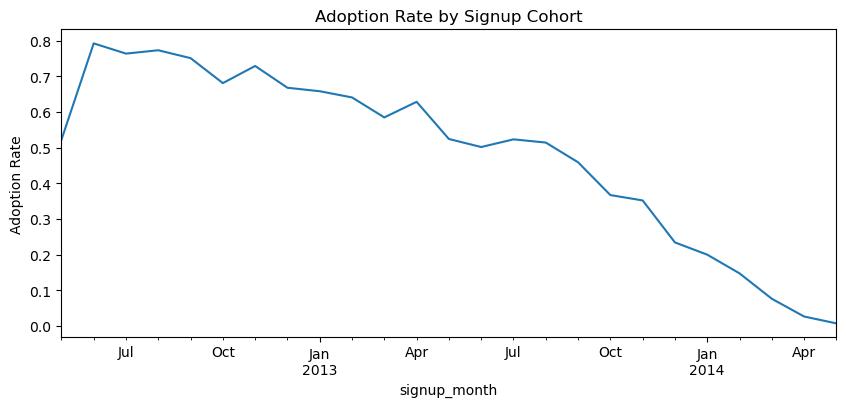

In [60]:
df3["signup_month"] = df3["creation_time"].dt.to_period("M")

df3.groupby("signup_month")["target_active"].mean().plot(figsize=(10,4))
plt.ylabel("Adoption Rate")
plt.title("Adoption Rate by Signup Cohort")
plt.show()

In [ ]:
#df_num2 = df_num.drop(columns=["days_in_last_7","object_id","org_id"])

In [61]:
# num_cols = list(df_num.columns)
# num_cols = [c for c in num_cols if c not in ["target_active"]]

num_importance = (
    df_num.corr()["target_active"]
          .sort_values(ascending=False)
)

num_importance

target_active                 1.000000
last_login_year               0.277790
visited                       0.160938
was_invited                   0.000308
opted_in_to_mailing_list     -0.007431
enabled_for_marketing_drip   -0.008140
last_login_month             -0.016717
last_login_day               -0.062522
never_logged_in              -0.160938
Name: target_active, dtype: float64

In [62]:
df3.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'visited', 'time_stamp_day',
       'days_in_last_7', 'target_active', 'last_session_datetime',
       'last_login_date', 'last_login_year', 'last_login_month',
       'last_login_day', 'never_logged_in', 'was_invited', 'signup_month'],
      dtype='object')

In [63]:
df_num.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'visited',
       'target_active', 'last_login_year', 'last_login_month',
       'last_login_day', 'never_logged_in', 'was_invited'],
      dtype='object')

In [64]:
# plt.figure(figsize =(5,5))
# sns.barplot(data = df_num, x='city', y='trips_in_first_30_days', hue = 'retained')
# plt.show()

In [65]:
print("Adoption rate by creation_source")
print(df.groupby("creation_source")["target_active"].mean().sort_values(ascending = False))
print("\n")

Adoption rate by creation_source
creation_source
SIGNUP_GOOGLE_AUTH    0.672475
GUEST_INVITE          0.630428
ORG_INVITE            0.628188
SIGNUP                0.624026
PERSONAL_PROJECTS     0.564733
Name: target_active, dtype: float64




In [66]:
print("Adoption rate by was_invited")
print(df.groupby("was_invited")["target_active"].mean().sort_values(ascending = False))
print("\n")

print("Adoption rate by never_logged_in")
print(df.groupby("never_logged_in")["target_active"].mean().sort_values(ascending = False))
print("\n")

print("Adoption rate by opted_in_to_mailing_list")
print(df.groupby("opted_in_to_mailing_list")["target_active"].mean().sort_values(ascending = False))

Adoption rate by was_invited
was_invited
1    0.629083
0    0.628784
Name: target_active, dtype: float64


Adoption rate by never_logged_in
never_logged_in
0    0.638563
1    0.000000
Name: target_active, dtype: float64


Adoption rate by opted_in_to_mailing_list
opted_in_to_mailing_list
0    0.631068
1    0.622862
Name: target_active, dtype: float64


Business Insights

Acquisition channel matters: Users signing up via Google Auth show the highest adoption, while Personal Projects users show the lowest.

Activation is critical: Users who log in at least once are far more likely to become adopted than users who never log in.

Marketing opt-ins have no impact: Mailing list and marketing drip enrollment show no meaningful relationship with adoption.

Cohort trend needs correction: The sharp drop in adoption for later signup cohorts is likely due to limited observation time, not true behavior change.

Recommended Actions

Improve signup experience: Make other signup methods as easy and smooth as Google sign-in, since users from Google sign-in adopt the product more.

Help users start faster: Guide new users to their first useful action as quickly as possible after signup.

Use in-product guidance instead of emails: Rely more on prompts and tips inside the product rather than marketing emails to drive adoption.
